In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import FileLink

# Load dataset
dataset = pd.read_csv('goalscorers.csv')

print(dataset.head())

# Data Cleaning
# Check for missing values
print("Missing values:\n", dataset.isnull().sum())

# Remove any rows with missing 'scorer' values (critical field for analysis)
dataset.dropna(subset=['scorer'], inplace=True)

# Ensure 'minute' column is numeric (if applicable, handle potential non-numeric values)
dataset['minute'] = pd.to_numeric(dataset['minute'], errors='coerce')
dataset.dropna(subset=['minute'], inplace=True)

# Create a new column for goals per player or team if it does not already exist
# For simplicity, we will count occurrences of each scorer's name as a proxy for goals scored
dataset['Goals'] = dataset.groupby('scorer')['scorer'].transform('count')

# Display the cleaned dataset
print(dataset.head())


         date  home_team away_team       team            scorer  minute  \
0  1916-07-02      Chile   Uruguay    Uruguay   José Piendibene    44.0   
1  1916-07-02      Chile   Uruguay    Uruguay  Isabelino Gradín    55.0   
2  1916-07-02      Chile   Uruguay    Uruguay  Isabelino Gradín    70.0   
3  1916-07-02      Chile   Uruguay    Uruguay   José Piendibene    75.0   
4  1916-07-06  Argentina     Chile  Argentina     Alberto Ohaco     2.0   

   own_goal  penalty  
0     False    False  
1     False    False  
2     False    False  
3     False    False  
4     False    False  
Missing values:
 date           0
home_team      0
away_team      0
team           0
scorer        49
minute       259
own_goal       0
penalty        0
dtype: int64
         date  home_team away_team       team            scorer  minute  \
0  1916-07-02      Chile   Uruguay    Uruguay   José Piendibene    44.0   
1  1916-07-02      Chile   Uruguay    Uruguay  Isabelino Gradín    55.0   
2  1916-07-02      C

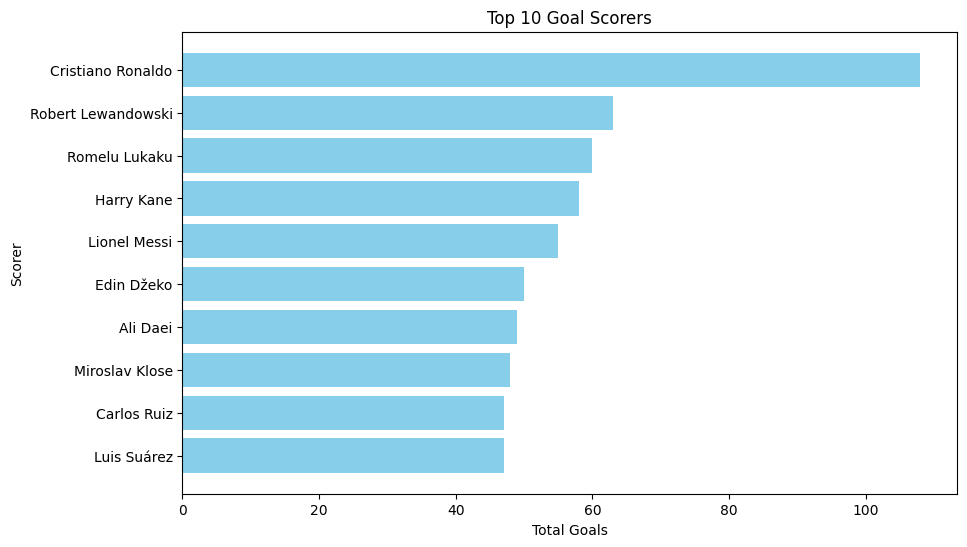

In [3]:
def plot_top_goal_scorers(data, n=10):
    top_players = data[['scorer', 'Goals']].drop_duplicates().nlargest(n, 'Goals')
    plt.figure(figsize=(10, 6))
    plt.barh(top_players['scorer'], top_players['Goals'], color='skyblue')
    plt.title('Top 10 Goal Scorers')
    plt.xlabel('Total Goals')
    plt.ylabel('Scorer')
    plt.gca().invert_yaxis()
    plt.show()

plot_top_goal_scorers(dataset)


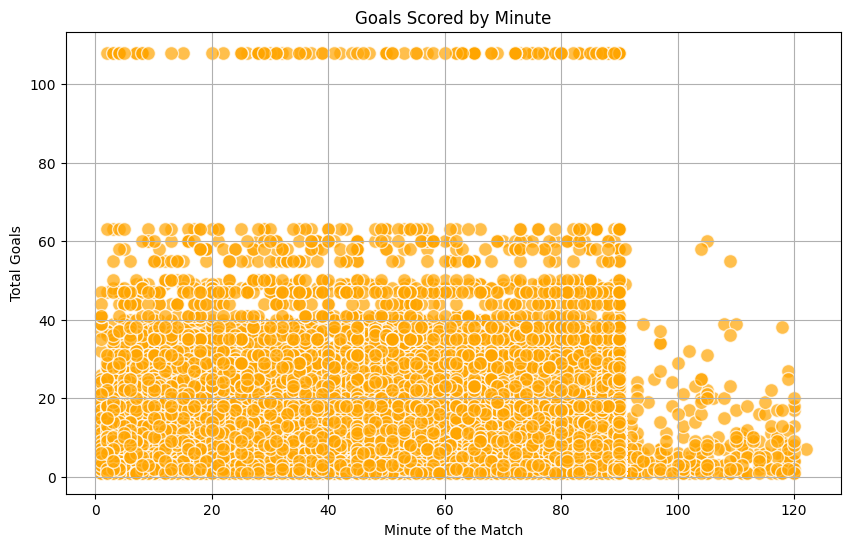

In [4]:
def plot_goals_by_minute(data):
    plt.figure(figsize=(10, 6))
    plt.scatter(data['minute'], data['Goals'], c='orange', alpha=0.7, edgecolors='w', s=100)
    plt.title('Goals Scored by Minute')
    plt.xlabel('Minute of the Match')
    plt.ylabel('Total Goals')
    plt.grid(True)
    plt.show()

plot_goals_by_minute(dataset)


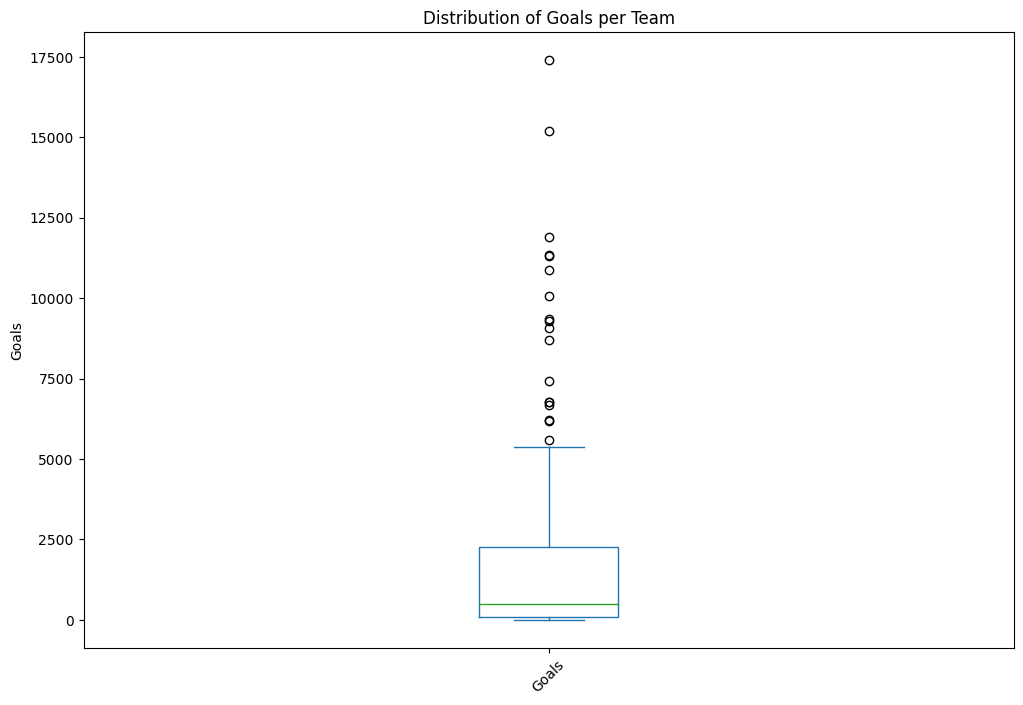

In [5]:
def plot_goals_per_team(data):
    team_goals = data.groupby('team')['Goals'].sum()
    plt.figure(figsize=(12, 8))
    team_goals.plot(kind='box')
    plt.title('Distribution of Goals per Team')
    plt.ylabel('Goals')
    plt.xticks(rotation=45)
    plt.show()

plot_goals_per_team(dataset)
